In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names=['ID','entity','sentiment','comment']
df=pd.read_csv(r'C:\Users\Gauri Patil\Desktop\sentiments.csv',header=0,names=column_names)

In [3]:
df.head()

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
df.shape

(74681, 4)

In [6]:
#count of unique entities
entity_count=df['entity'].value_counts()
print(entity_count)

entity
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)        

In [7]:
df.info

<bound method DataFrame.info of          ID       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                 comment  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window

In [8]:
duplicates=df.duplicated()
duplicated_rows=df[duplicates]
duplicated_rows.count()

ID           2701
entity       2701
sentiment    2701
comment      2341
dtype: int64

In [9]:
#droping duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.isnull().sum()

ID             0
entity         0
sentiment      0
comment      326
dtype: int64

In [11]:
#dropping missing values
df=df.dropna()

In [12]:
df.isnull().sum()

ID           0
entity       0
sentiment    0
comment      0
dtype: int64

In [13]:
#number of unique values
df.nunique()

ID           12447
entity          32
sentiment        4
comment      69488
dtype: int64

In [14]:
for i in range(5):
    print(f"{i+1}: {df['comment'][i]}  ->  {df['sentiment'][i]}")

1: I am coming to the borders and I will kill you all,  ->  Positive
2: im getting on borderlands and i will kill you all,  ->  Positive
3: im coming on borderlands and i will murder you all,  ->  Positive
4: im getting on borderlands 2 and i will murder you me all,  ->  Positive
5: im getting into borderlands and i can murder you all,  ->  Positive


In [15]:
#sentiment analysis
df['sentiment'].value_counts()

sentiment
Negative      21698
Positive      19712
Neutral       17707
Irrelevant    12537
Name: count, dtype: int64

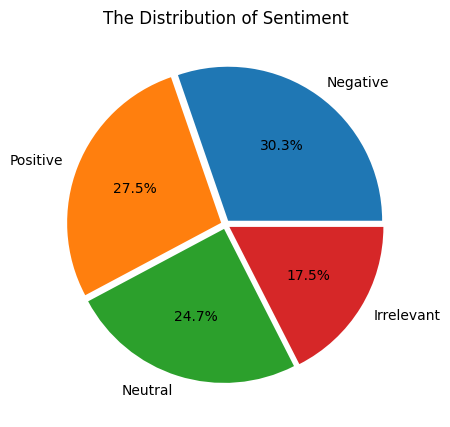

In [19]:
plt.figure(figsize=(10,5))
plt.pie(x=df['sentiment'].value_counts().values,
        labels=df['sentiment'].value_counts().index,
        autopct='%.1f%%',explode=[0.03,0.03,0.03,0.03])
plt.title('The Distribution of Sentiment')
plt.show()

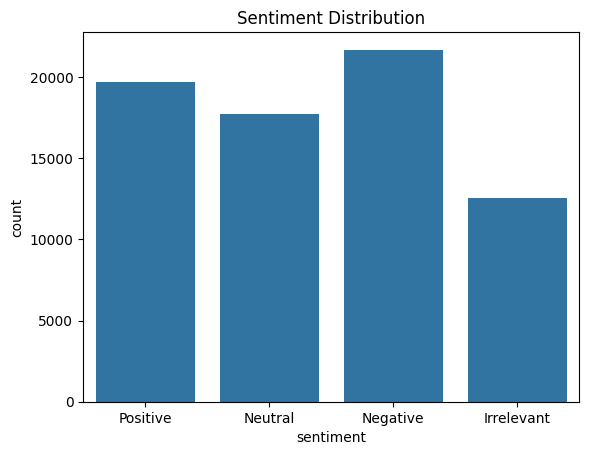

In [20]:
sns.countplot(x='sentiment',data=df)
plt.title('Sentiment Distribution')
plt.show()

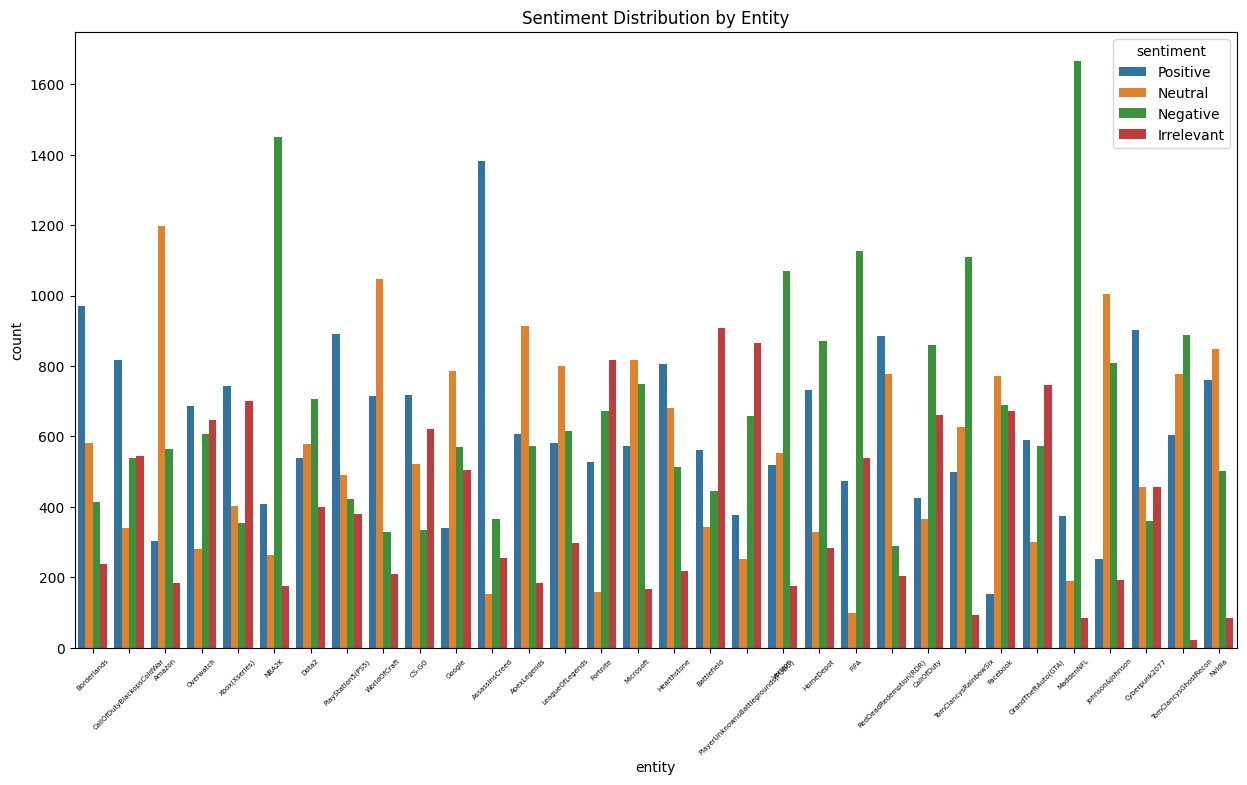

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(x='entity',hue='sentiment',data=df)
plt.title('Sentiment Distribution by Entity')
plt.xticks(rotation=45,fontsize=5)
plt.show()

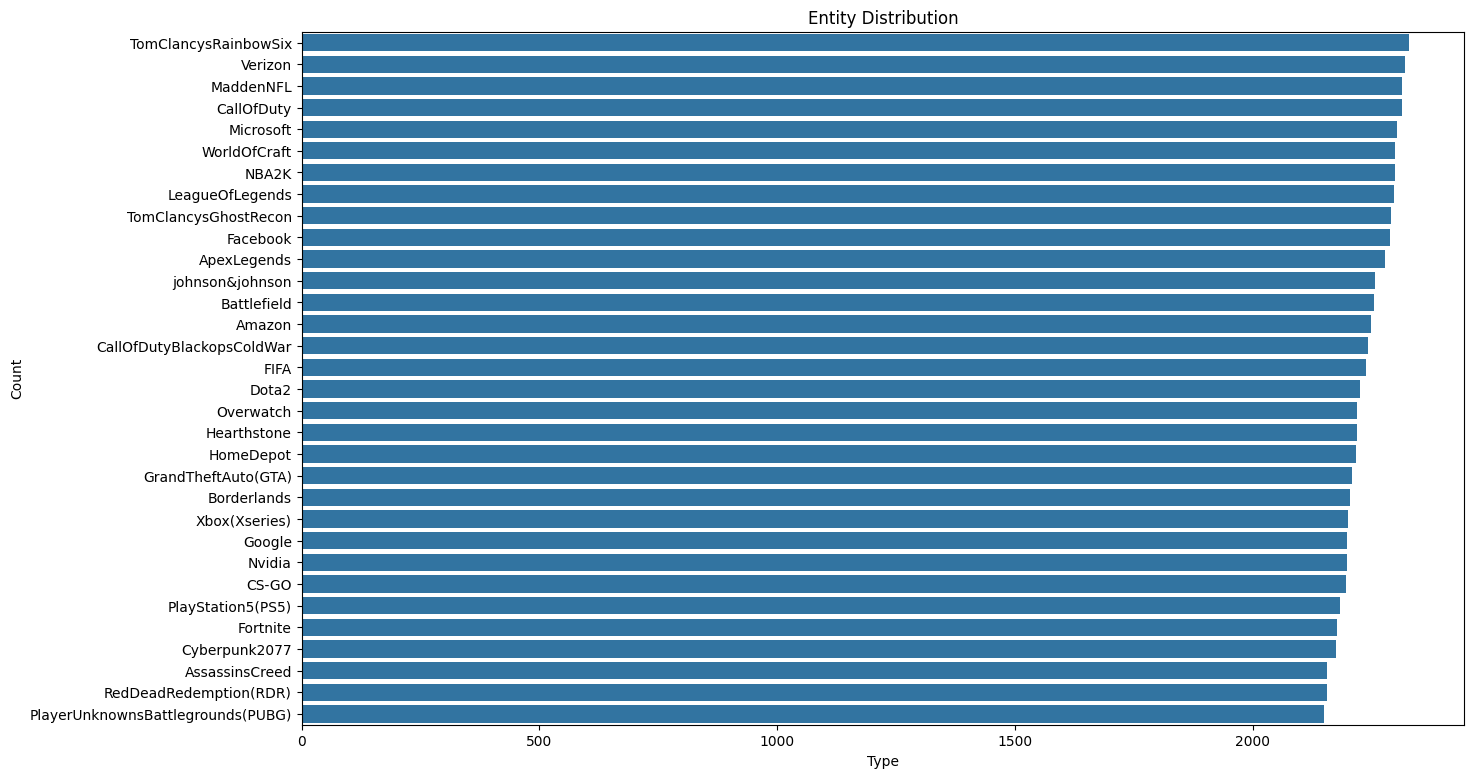

In [23]:
plt.figure(figsize=(15,9))
sns.barplot(x=df['entity'].value_counts().values,y=df['entity'].value_counts().index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Entity Distribution')
plt.show()

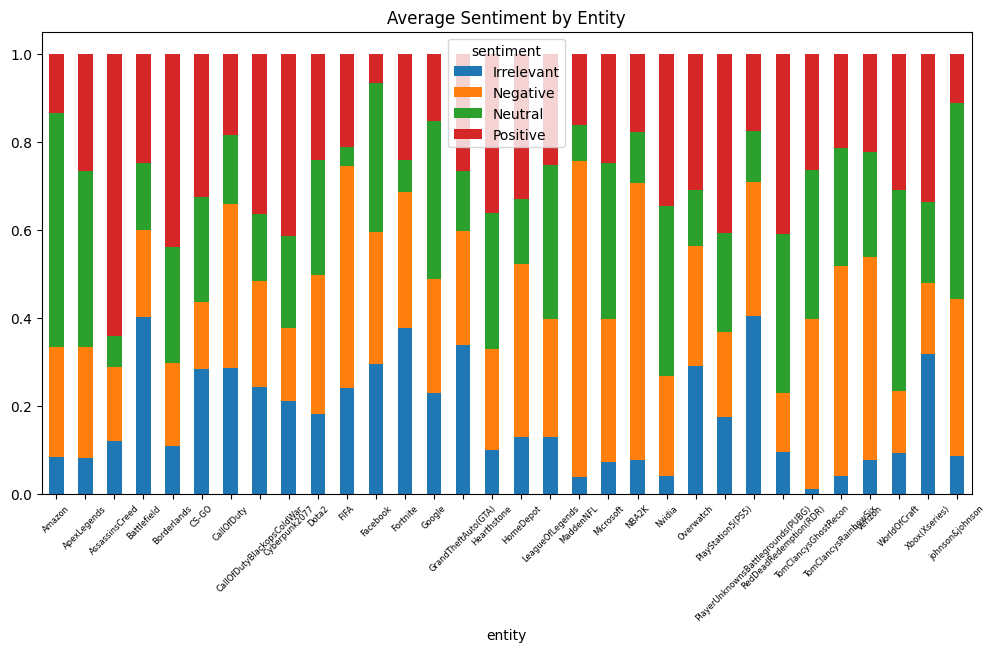

In [24]:
average_sentiment_by_entity=df.groupby('entity')['sentiment'].value_counts(normalize=True).unstack()
average_sentiment_by_entity.plot(kind='bar',stacked=True,figsize=(12,6))
plt.title('Average Sentiment by Entity')
plt.xticks(rotation=45,fontsize=6)
plt.show()

In [ ]:
r